### Day 4 Notes Continued - Pandas for Data Analysis and Statistics

### Important Python Packages for Stats
- matplotlib (plotting)
- pandas (Excel spreadsheets)
- NumPy (arrays, math functions, linear algebra)
- SciPy  (lots of stuff including stats)
- StatsModels (stats, most similar to R)
- SkLearn (stats + machine learning)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Basic Pandas Stuff

pandas is a library that provides data structures and data analysis tools that will be very helpful to us.

Its name (written in lowercase) derives from PANel DAta, a common term for multidimensional data sets encountered in statistics and econometrics.

Consider the student data below:

|  Student |Weight   | Height | Gender |
|---   |---   |---   |---   |
|Mary	|100	|    62	 |   Female|
|Mike	|120	|    66	 |   Male|
|Joe	|140	|    68	 |   Male|
|Janet	|110	 |   62	   | Female|
|Steve	|160	|    N/A	  |  Male|
|Alissa	|N/A	 |   N/A	   | Female|
|Alison	|140	 |   66	   | Female|
|Maya	|110	  |  63	   | Female|
|Ryan	|180	  |  72	   | Male|
|Paul	|190	  |  72	   | Male|
|Michael	|200	  |  73	   | Male|




One way of creating a dataframe is to first create separate lists for the names, weights, height, and gender:

In [65]:
import pandas as pd

names = ['Mary', 'Mike', 'Joe', 'Janet', 'Steve', 'Alissa', 'Alison', 'Maya', 'Ryan', 'Paul', 'Michael']
weight = [100, 120, 140, 110, 160, np.nan, 140, 110, 180, 190, 200]
height = [62, 66, 68, 62, np.nan, np.nan, 66, 63, 72, 72, 73]
gender = ['F', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M']

students = pd.DataFrame({'weight': weight, 'height': height, 'gender': gender}, index = names)
students

,weight,height,gender
Mary,100.0,62.0,F
Mike,120.0,66.0,M
Joe,140.0,68.0,M
Janet,110.0,62.0,F
Steve,160.0,NaN,M
Alissa,NaN,NaN,F
Alison,140.0,66.0,F
Maya,110.0,63.0,F
Ryan,180.0,72.0,M
Paul,190.0,72.0,M


Too see the shape of the dataframe:

In [66]:
students.shape

(11, 3)

And the data types:

In [67]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Mary to Michael
Data columns (total 3 columns):
weight    10 non-null float64
height    9 non-null float64
gender    11 non-null object
dtypes: float64(2), object(1)
memory usage: 352.0+ bytes


If we wanted to fill in an entire column with the same value, we could type the following. (Kind of like dragging down a cell in Excel.)

In [68]:
students['school'] = 'Oregon Episcopal School'
students

,weight,height,gender,school
Mary,100.0,62.0,F,Oregon Episcopal School
Mike,120.0,66.0,M,Oregon Episcopal School
Joe,140.0,68.0,M,Oregon Episcopal School
Janet,110.0,62.0,F,Oregon Episcopal School
Steve,160.0,NaN,M,Oregon Episcopal School
Alissa,NaN,NaN,F,Oregon Episcopal School
Alison,140.0,66.0,F,Oregon Episcopal School
Maya,110.0,63.0,F,Oregon Episcopal School
Ryan,180.0,72.0,M,Oregon Episcopal School
Paul,190.0,72.0,M,Oregon Episcopal School


Suppose you wanted to create another column for weight in kilograms. You could type:

In [69]:
students['weight_kg'] = students['weight']/2.205
students.head()

,weight,height,gender,school,weight_kg
Mary,100.0,62.0,F,Oregon Episcopal School,45.351474
Mike,120.0,66.0,M,Oregon Episcopal School,54.421769
Joe,140.0,68.0,M,Oregon Episcopal School,63.492063
Janet,110.0,62.0,F,Oregon Episcopal School,49.886621
Steve,160.0,NaN,M,Oregon Episcopal School,72.562358


If we wanted to specify that we wanted the third through 6th rows, we could type:

In [70]:
students[3:7]

,weight,height,gender,school,weight_kg
Janet,110.0,62.0,F,Oregon Episcopal School,49.886621
Steve,160.0,NaN,M,Oregon Episcopal School,72.562358
Alissa,NaN,NaN,F,Oregon Episcopal School,NaN
Alison,140.0,66.0,F,Oregon Episcopal School,63.492063


Recall that "Ryan" was located in the 9th row (in the index 8). "iloc" refers to the index position.  We could get his info this way:

In [71]:
students.iloc[8]

weight                           180
height                            72
gender                             M
school       Oregon Episcopal School
weight_kg                    81.6327
Name: Ryan, dtype: object

If we wanted to look Ryan's info up by his label, we could use "loc":

In [72]:
students.loc['Ryan']

weight                           180
height                            72
gender                             M
school       Oregon Episcopal School
weight_kg                    81.6327
Name: Ryan, dtype: object

To get Ryan's weight:

In [73]:
students.loc['Ryan']['weight']

180.0

To change Ryan's weight, we could type:

In [74]:
students.loc['Ryan', 'weight'] = 200

To get all of the student weights, we can type:

In [75]:
students['weight']

Mary       100.0
Mike       120.0
Joe        140.0
Janet      110.0
Steve      160.0
Alissa       NaN
Alison     140.0
Maya       110.0
Ryan       200.0
Paul       190.0
Michael    200.0
Name: weight, dtype: float64

Or we can type:

In [76]:
students.weight

Mary       100.0
Mike       120.0
Joe        140.0
Janet      110.0
Steve      160.0
Alissa       NaN
Alison     140.0
Maya       110.0
Ryan       200.0
Paul       190.0
Michael    200.0
Name: weight, dtype: float64

Often, we'll only want to look at data that satisifies certain criteria. In that case, we can introduce Boolean indexing, so that only data that satisfies the conditions gets viewed:

In [77]:
students[students.gender == 'F']

,weight,height,gender,school,weight_kg
Mary,100.0,62.0,F,Oregon Episcopal School,45.351474
Janet,110.0,62.0,F,Oregon Episcopal School,49.886621
Alissa,NaN,NaN,F,Oregon Episcopal School,NaN
Alison,140.0,66.0,F,Oregon Episcopal School,63.492063
Maya,110.0,63.0,F,Oregon Episcopal School,49.886621


Or two conditions:

In [78]:
students[(students.gender == 'F') & (students.weight >= 140)]

,weight,height,gender,school,weight_kg
Alison,140.0,66.0,F,Oregon Episcopal School,63.492063


If we only wanted to view students who were girls OR weighed at least 140, we could type:

In [79]:
students[(students.gender == 'F') | (students.weight >= 140)]

,weight,height,gender,school,weight_kg
Mary,100.0,62.0,F,Oregon Episcopal School,45.351474
Joe,140.0,68.0,M,Oregon Episcopal School,63.492063
Janet,110.0,62.0,F,Oregon Episcopal School,49.886621
Steve,160.0,NaN,M,Oregon Episcopal School,72.562358
Alissa,NaN,NaN,F,Oregon Episcopal School,NaN
Alison,140.0,66.0,F,Oregon Episcopal School,63.492063
Maya,110.0,63.0,F,Oregon Episcopal School,49.886621
Ryan,200.0,72.0,M,Oregon Episcopal School,81.632653
Paul,190.0,72.0,M,Oregon Episcopal School,86.167800
Michael,200.0,73.0,M,Oregon Episcopal School,90.702948


One major thing that you will always need to deal with is what to do with missing data. Big data sets are almost always incomplete. We notice that there are two missing height values. If we wanted to drop any rows that were missing weight or height data, we could use dropna:

In [80]:
#students = students.dropna(subset=['weight', 'height'])

However, what we'll choose to do instead in this case is fill in the missing values with something. What should we fill them in with? Well, it depends on the situation. Sometimes, you may want to fill in missing values with zero. In this case, though, I will fill in the missing weight and height values with the average weight and height values and round to two decimal places:

In [81]:
students['height'] = students['height'].fillna(students['height'].mean()).round(2)
students['weight'] = students['weight'].fillna(students['weight'].mean()).round(2)
students

,weight,height,gender,school,weight_kg
Mary,100.0,62.00,F,Oregon Episcopal School,45.351474
Mike,120.0,66.00,M,Oregon Episcopal School,54.421769
Joe,140.0,68.00,M,Oregon Episcopal School,63.492063
Janet,110.0,62.00,F,Oregon Episcopal School,49.886621
Steve,160.0,67.11,M,Oregon Episcopal School,72.562358
Alissa,147.0,67.11,F,Oregon Episcopal School,NaN
Alison,140.0,66.00,F,Oregon Episcopal School,63.492063
Maya,110.0,63.00,F,Oregon Episcopal School,49.886621
Ryan,200.0,72.00,M,Oregon Episcopal School,81.632653
Paul,190.0,72.00,M,Oregon Episcopal School,86.167800


Note: In Python you can use the words "and" and "or", but in pandas you must use "&" and "|" to denote them or else you'll get an error.

To plot the students weights vs heights:

Text(0, 0.5, 'height')

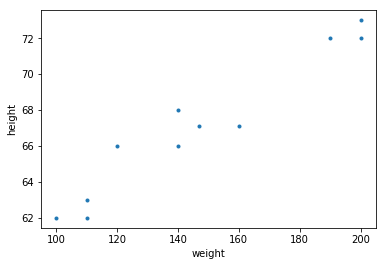

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

w = students.weight
h = students.height

plt.plot(w,h,'.')
plt.xlabel('weight')
plt.ylabel('height')


To plot histograms of all the numerical variables:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12282fcf8>,
      dtype=object)

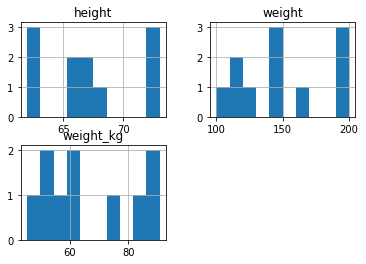

In [83]:
students.hist()

Or for just the weight:

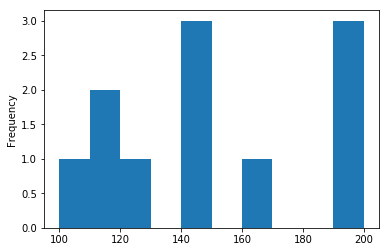

In [84]:
students.weight.plot.hist()

Or more cleaned up with a few more parameters:

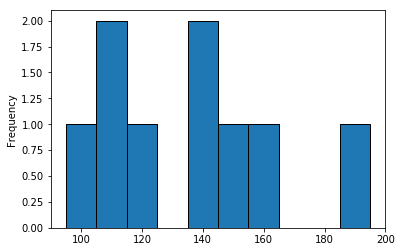

In [86]:
import numpy as np
students.weight.plot.hist(bins=np.arange(95,205,10), edgecolor="black")

For summary stats:

In [91]:
students.describe()

,weight,height,weight_kg
count,11.000000,11.000000,10.000000
mean,147.000000,67.110909,65.759637
std,36.619667,3.935593,16.316730
min,100.000000,62.000000,45.351474
25%,115.000000,64.500000,51.020408
50%,140.000000,67.110000,63.492063
75%,175.000000,70.000000,79.365079
max,200.000000,73.000000,90.702948


Or more specific stats:

In [24]:
print('count', students.weight.count())
print('mean', students.weight.mean())
print(students.weight.std())
print(students.weight.min())
print(students.weight.median())
print(students.weight.max())

count 11
mean 146.36363636363637
36.680438185149114
100
140.0
200


To sort by weight:

In [92]:
students.sort_values(by = 'weight')

,weight,height,gender,school,weight_kg
Ryan,200.0,72.00,M,Oregon Episcopal School,81.632653
Michael,200.0,73.00,M,Oregon Episcopal School,90.702948
Paul,190.0,72.00,M,Oregon Episcopal School,86.167800
Steve,160.0,67.11,M,Oregon Episcopal School,72.562358
Alissa,147.0,67.11,F,Oregon Episcopal School,NaN
Joe,140.0,68.00,M,Oregon Episcopal School,63.492063
Alison,140.0,66.00,F,Oregon Episcopal School,63.492063
Mike,120.0,66.00,M,Oregon Episcopal School,54.421769
Janet,110.0,62.00,F,Oregon Episcopal School,49.886621
Maya,110.0,63.00,F,Oregon Episcopal School,49.886621


Or sorting in decending order of frequency:

In [26]:
students.weight.value_counts()

140    3
110    2
200    2
120    1
190    1
100    1
160    1
Name: weight, dtype: int64

Or ascending order of frequency:

In [27]:
students.weight.value_counts(ascending = True)

160    1
100    1
190    1
120    1
200    2
110    2
140    3
Name: weight, dtype: int64

### Pregnancy Dataset
<img src="images/cwic2.png" style="width: 300px;"/>


The CDC National Survey of Family Growth (NSFG) gathers information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and general and reproductive health. 

Its 2002 pregnancy dataset contains 13593 respondents and 244 attributes.

https://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm

How do I open the file?

index_col = 0 denotes that I want the first column treated as the row labels.

In [93]:
preg = pd.read_csv('2002FemPreg.csv', index_col = 0)

How do I know how big the dataset is?

In [29]:
preg.shape

(13593, 244)

How do I view the first few rows of the data?

In [30]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


How do I know what the attributes are?

In [31]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

 It is common that there is extra space when you read in a file. This space is problematic when you want to refer to a column by name. Thus, we want to strip all extra whitespace from the column names using this command:

In [32]:
preg.columns = preg.columns.str.strip()

One of the variables is pregnancy outcome, i.e., if the baby is carried to term or not (no miscarriages or still births). Let's limit our calculations below to live births:

In [33]:
live = preg[preg.outcome == 1]
live.shape

(9148, 244)

This is a huge dataset. What if there is missing data? Let's limit our focus to rows where the mother's age and the baby's weight are nonempty.

In [34]:
live = live.dropna(subset=['agepreg', 'birthwgt_lb'])
live.shape

(9084, 244)

What are some descriptive stats for baby weight?

In [35]:
live['birthwgt_lb'].describe()

count    9084.000000
mean        6.832122
std         1.411447
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        15.000000
Name: birthwgt_lb, dtype: float64

A frequency chart for baby weight:

In [36]:
live['birthwgt_lb'].value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

What does a histogram of the data look like?

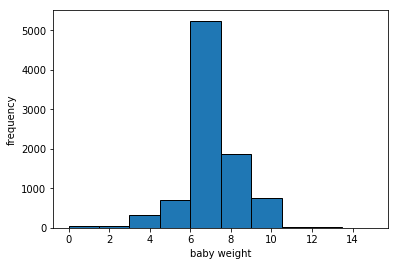

In [95]:
plt.hist(live['birthwgt_lb'], edgecolor="black");
plt.xlabel('baby weight');
plt.ylabel('frequency');

With a few extra arguments, we can make the plot prettier.

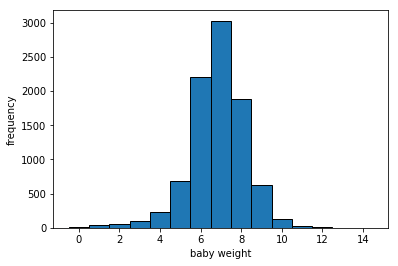

In [96]:
plt.hist(live['birthwgt_lb'],edgecolor="black",bins=np.arange(-0.5,15.5,1));
plt.xlabel('baby weight');
plt.ylabel('frequency');

### Question 1: Do firstborns weigh less than later children?

Let's save firstborns and later siblings into different variables based on birth order:

In [39]:
firsts = live[live.birthord == 1].birthwgt_lb
others = live[live.birthord != 1].birthwgt_lb


What is the mean birth weight of each?

In [40]:
print(firsts.mean(), others.mean())
firsts?

6.752968036529681 6.905824829931973


Hmm. It looks like others may weigh a bit more than first borns. Let's make a comparative histogram:

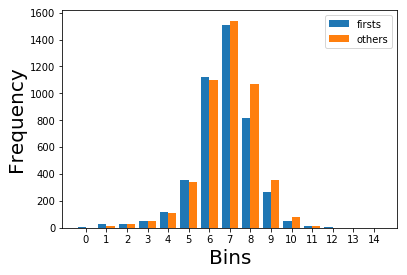

In [41]:
plt.hist([firsts, others], bins = np.arange(-.5, 15.5, 1),label=['firsts', 'others']);
plt.xlabel('Bins', size=20);
plt.ylabel('Frequency', size=20);
plt.xticks(np.arange(0,15,1));
plt.legend();

You can use a two-sample t-test to conclude whether the difference between firstborn and later siblings' weights are actually statistically significant. 

In [42]:
import scipy.stats as sp

sp.ttest_ind(firsts, others)

Ttest_indResult(statistic=-5.164941440079655, pvalue=2.456175491391312e-07)

The p-value is so small that we conclude that there is a statistically significant difference between firstborn weights and later baby weights.

### Question 2: Do Older Moms Have Heavier Babies?

Let's save the mother ages as mother_ages and the baby weights as baby_weights for ease of working with them:

In [43]:
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
mother_ages = live['agepreg']
baby_weights = live['totalwgt_lb']

How old were the oldest and youngest mothers?

In [44]:
mother_ages.describe()

count    9038.000000
mean       24.936129
std         5.553985
min        10.830000
25%        20.500000
50%        24.330000
75%        28.890000
max        44.080000
Name: agepreg, dtype: float64

What does a scatterplot of mother's age vs baby's weight look like?

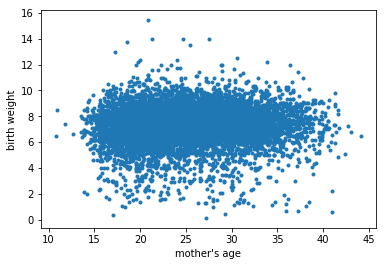

In [45]:
plt.plot(mother_ages, baby_weights,'.');
plt.xlabel("mother's age");
plt.ylabel("birth weight");

Sometimes it helps to play around with opacity in order to see more tightly clustered points:

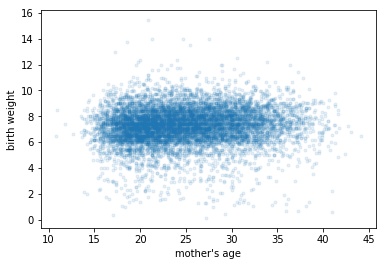

In [46]:
plt.plot(mother_ages, baby_weights,'.',alpha = 0.1);
plt.xlabel("mother's age");
plt.ylabel("birth weight");

What if you want to calculate a linear regression line?

You don't need anything more than numpy:

In [47]:
import numpy as np

m, b = np.polyfit(mother_ages, baby_weights, 1)
print(m,b)

0.017453851471802985 6.830396973311049


To superimpose the line of best fit on the scatterplot:

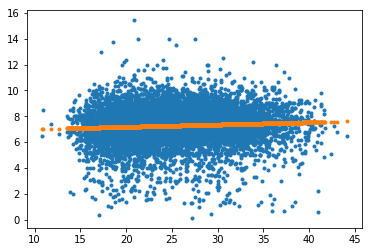

In [48]:
fit = np.polyfit(mother_ages, baby_weights,1);
fit_fn = np.poly1d(fit); 
plt.plot(mother_ages, baby_weights,'.'); #observed points
plt.plot(mother_ages, fit_fn(mother_ages),'.'); #predicted points

We can run a linear least-squares regression test using scipy:

In [49]:
from scipy.stats import linregress

linregress(mother_ages, baby_weights)

LinregressResult(slope=0.01745385147180276, intercept=6.8303969733110526, rvalue=0.0688339703541091, pvalue=5.722947107314803e-11, stderr=0.0026611480116264744)

But wait, how can the p-value AND correlation coefficent both be so tiny?

https://www.researchgate.net/post/What_is_the_relationship_between_R-squared_and_p-value_in_a_regression


"Low r-squared and low p-value means that your model doesn't explain much of the variation of the data but it is still significant (better than not having a model)"

"With enough power, R-squared values very close to zero can be statistically significant, but that doesn't mean they have practical significance. It is a statistical artifact. So, plot the data, see if there is linear trend in the plot, analyze the residuals (points off the line) to see if underlying assumptions are met, and if so, then determine that the fit is good."

Another package that has cleaner user printouts is StatsModels:

In [52]:
import statsmodels.api as sm

X = mother_ages.values
Y = baby_weights.values
X = sm.add_constant(X) #A y intercept is not included by default - must add it
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.02
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           5.72e-11
Time:                        23:38:50   Log-Likelihood:                -15897.
No. Observations:                9038   AIC:                         3.180e+04
Df Residuals:                    9036   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8304      0.068    100.470      0.000       6.697       6.964
x1             0.0175      0.003      6.559      0.000       0.012       0.023
==============================================================================
Omnibus:                     1024.052   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3081.833
Skew:                          -0.601   Prob(JB):                         0.00
Kurtosis:                       5.596   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Rollercoaster Problem
Classwork/Homework: Read the 2018 HiMCM Rollercoaster Problem located here:
        
https://www.comap.com/highschool/contests/himcm/2018problems.html

Use Pandas to come up with a solution. My own rollercoaster notebook will also be available that covers additional topics such as datetime and linear least squares.

### Teacher Comment Writing
View this folder if you'd like to view ways of automating your narrative student comment writing using pandas.